In [1]:
import torch
import numpy as np
from sklearn import metrics
from src.models import PyGod
import matplotlib.pyplot as plt
from src.graph_data_loader import graph_loader

In [2]:
swap_rate=0.05
splits = ['whole', 'mutually_exclusive', 'shuffled']
model_inference = ['mlpae', 'gcnae', 'dominant', 'ocgnn']
model_transductive = ['mlpae', 'scan', 'radar', 'anomalous', 'one', 'done', 'adone', 'gaan']

In [3]:
def get_random_score(test_target, model_name='random'):
    test_outlier_scores = np.random.rand(len(test_target))

    #print(f"\n{model_name} train score: ", metrics.roc_auc_score(train_target, train_outlier_scores))

    test_score = metrics.roc_auc_score(test_target,test_outlier_scores)
    print(f"{model_name} test score: ", test_score)

    fpr, tpr, _ = metrics.roc_curve(test_target, test_outlier_scores)

    return{
        'label': "{}, auc={:.3f}".format("random_scores", test_score),
        'fpr': fpr,
        'tpr': tpr
    }

In [4]:
def get_model_scores(model_name, train_graph, test_graph, supervised, swap_rate):
        
    model = PyGod(model_name, swap_rate, supervised)
    model.train(train_graph)
    
    train_outlier_scores = model.get_train_scores()
    test_outlier_scores = model.predict(test_graph)
    
    
    return train_outlier_scores, test_outlier_scores

In [5]:
def get_roc_scores(model_names, split, swap_rate, supervised=False):

    train_graph, test_graph = graph_loader(split_type=split, swap_rate=swap_rate)
    
    model_roc_curves.append(get_random_score(test_graph.y))

    for model_name in model_names:
        print(f"calculating for model {model_name}")
        try:
            train_outlier_scores, test_outlier_scores = get_model_scores(model_name, 
                                                                         train_graph,  
                                                                         test_graph, 
                                                                         supervised=supervised,
                                                                         swap_rate=swap_rate)
        except Exception as e:
            print(f"Model calculation error for {model_name}:")
            print(e)
    
        try:
            if split != 'whole':
                print(f"\n{model_name} train score: ", metrics.roc_auc_score(train_graph.y, train_outlier_scores))

            test_score = metrics.roc_auc_score(test_graph.y,test_outlier_scores)
            print(f"{model_name} test score: ", test_score)

            fpr, tpr, _ = metrics.roc_curve(test_graph.y, test_outlier_scores)

            model_roc_curves.append({
            'label': "{}, auc={:.3f}".format(model_name, test_score),
            'fpr': fpr,
            'tpr': tpr
            })
        except Exception as e:
            print(f"Results scoring error for {model_name}:")
            print(e)    


Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx
random test score:  0.5082230689296848
calculating for model mlpae


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')



mlpae train score:  0.48704682021878704
mlpae test score:  0.4641496363006581
calculating for model gcnae


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')



gcnae train score:  0.7007219316645221
gcnae test score:  0.7262764114998268
calculating for model dominant


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')



dominant train score:  0.3553219902516982
dominant test score:  0.427730054266251
calculating for model ocgnn


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')



ocgnn train score:  0.4768782100190786
ocgnn test score:  0.4907377900935227


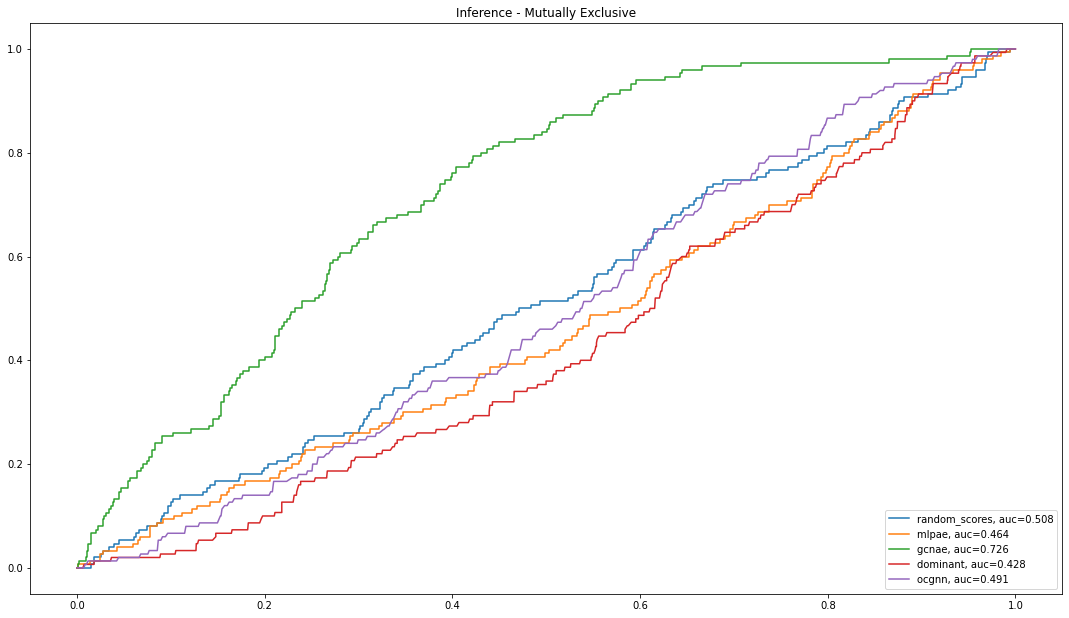

In [6]:
model_roc_curves = []
#model_roc_curves.append(get_random_score(test_target))

get_roc_scores(model_inference, 'mutually_exclusive', swap_rate, supervised=False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
    
for curve in model_roc_curves:
    plt.plot(curve['fpr'],curve['tpr'],label=curve['label'])

plt.title('Inference - Mutually Exclusive')
plt.legend(loc=4)
plt.show()

random test score:  0.5051725930546892
calculating for model mlpae


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')


mlpae test score:  0.4839233728425868
calculating for model scan


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\models\scan.py:186: UserWarning: The model is transductive only. Training data is used to predict
  warnings.warn('The model is transductive only. '
c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')


scan test score:  0.5094527621820198
calculating for model radar


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\models\radar.py:142: UserWarning: The model is transductive only. Training data is used to predict
  warnings.warn('The model is transductive only. '
c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')


radar test score:  0.48517412787531317
calculating for model anomalous


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\models\anomalous.py:143: UserWarning: The model is transductive only. Training data is used to predict
  warnings.warn('The model is transductive only. '


anomalous test score:  0.48517412787531317
calculating for model one
one test score:  0.48288613116279994
calculating for model done


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')


done test score:  0.483150805203207
calculating for model adone


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')


adone test score:  0.48571482207633176
calculating for model gaan


c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\utils\utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')
c:\Users\aheli\AppData\Local\Programs\Python\Python310\lib\site-packages\pygod\models\gaan.py:239: UserWarning: The model is transductive only. Training data is used to predict
  warnings.warn('The model is transductive only. '


gaan test score:  0.48339196183082644


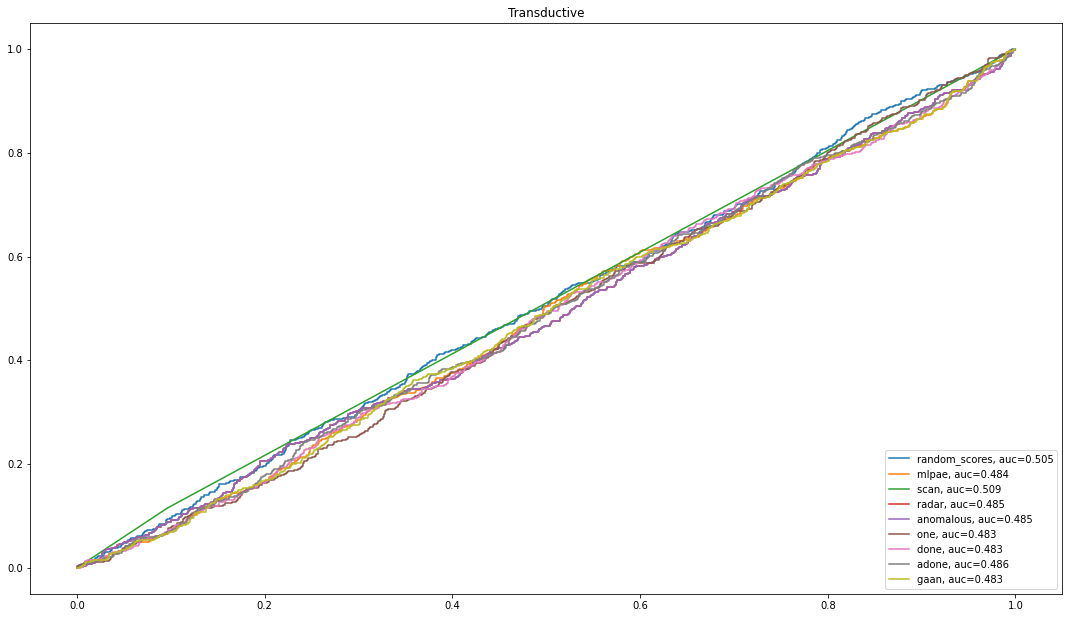

In [7]:
model_roc_curves = []

get_roc_scores(model_transductive, 'whole', swap_rate, supervised=False)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
    
for curve in model_roc_curves:
    plt.plot(curve['fpr'],curve['tpr'],label=curve['label'])

plt.title('Transductive')
plt.legend(loc=4)
plt.show()